https://medium.com/analytics-vidhya/momentum-trading-with-macd-and-rsi-yfinance-python-e5203d2e1a8a

### Trading with MACD and RSI - Yfinance & Python

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import yfinance as yf
#import pandas_datareader as pdr

In [3]:
data = pd.read_csv('reliance.csv',index_col='Datetime',parse_dates=True)

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-03-03 09:15:00+05:30,2121.250000,2127.649902,2117.600098,2127.199951,2127.199951,0
2021-03-03 09:16:00+05:30,2127.050049,2127.050049,2121.500000,2125.500000,2125.500000,81755
2021-03-03 09:17:00+05:30,2125.000000,2125.899902,2123.250000,2124.000000,2124.000000,53717
2021-03-03 09:18:00+05:30,2124.100098,2124.100098,2121.000000,2121.050049,2121.050049,48830
2021-03-03 09:19:00+05:30,2120.949951,2125.899902,2120.899902,2125.250000,2125.250000,54349


In [5]:
idx = data.index.strftime('%H:%M')
data.index = idx

In [6]:
df = data.copy()

## Relative Strength Index (RSI)

- when the RSI surpasses the horizontal 30 reference level, it is a bullish sign and when it slides below the horizontal 70 reference level, it is a bearish sign.

In [7]:
import talib as ta

In [8]:
df['rsi'] = ta.RSI(df['Close'],timeperiod=14)

## Plot the RSI and 'Close Prices':


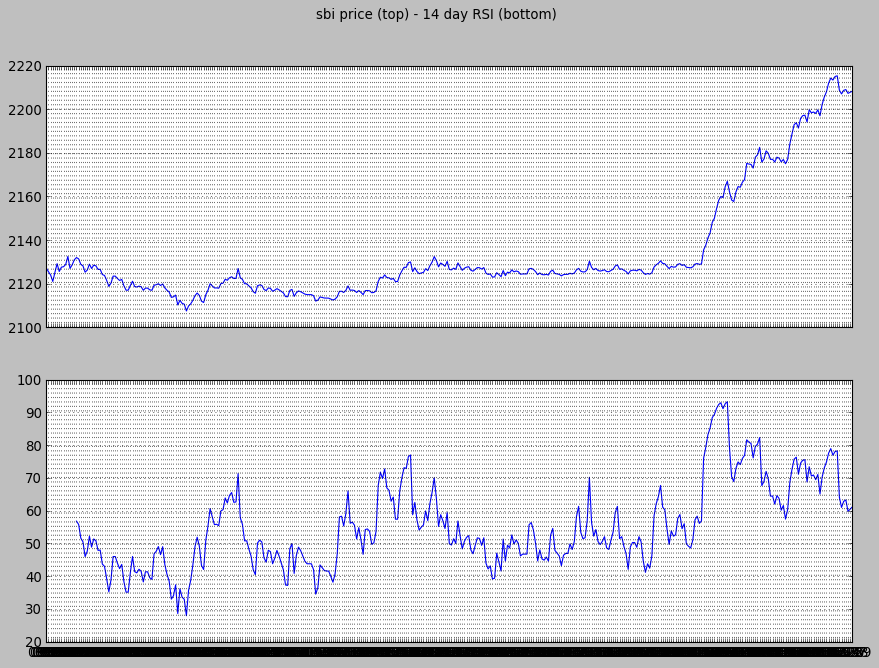

In [9]:
## chart the stock price and RSI
plt.style.use('_classic_test')
fig, axs = plt.subplots(2, sharex=True, figsize=(13,9))
fig.suptitle('sbi price (top) - 14 day RSI (bottom)')

axs[0].plot(df['Close'])
axs[1].plot(df['rsi'])
axs[0].grid()
axs[1].grid()

## Generate buy and sell signals

In [10]:
df['long tomorrow'] = np.nan
df['buy signal'] = np.nan
df['sell signal'] = np.nan
df['buy rsi'] = np.nan
df['sell rsi'] = np.nan
df['strategy'] = np.nan

In [14]:
for i in range(15,len(df)):
    # calculate "long tomorrow" column
    if ((df['rsi'].iloc[i] <= 40) & (df['rsi'].iloc[i-1] > 40)):
        df['long tomorrow'].iloc[i] = True
    elif ((df['long tomorrow'].iloc[i-1]==True) * (df['rsi'].iloc[i] <= 70)):
        df['long tomorrow'].iloc[i] = True
    else:
        df['long tomorrow'].iloc[i] = False
    
    # calculate "buy signal" column
    if ((df['long tomorrow'].iloc[i]==True) & (df['long tomorrow'].iloc[i-1]==False)):
        df['buy signal'].iloc[i] = df['Close'].iloc[i]
        df['buy rsi'].iloc[i] = df['rsi'].iloc[i]
        
    # calculate "sell signal" column
    if ((df['long tomorrow'].iloc[i]==False) & (df['long tomorrow'].iloc[i-1]==True)):
        df['sell signal'].iloc[i] = df['Close'].iloc[i]
        df['sell rsi'].iloc[i] = df['rsi'].iloc[i]
        
# calculate strategy perfromance
df['strategy'].iloc[15] = df['Close'].iloc[15]
    
for x in range(16,len(df)):
    if df['long tomorrow'].iloc[i-1] == True:
        df['strategy'].iloc[i] = df['strategy'].iloc[i-1] * (df['Close'].iloc[i]/df['Close'].iloc[i-1])
    else:
        df['strategy'].iloc[i] = df['strategy'].iloc[i-1]

In [15]:
df

,Open,High,Low,Close,Adj Close,Volume,rsi,long tomorrow,buy signal,sell signal,buy rsi,sell rsi,strategy
09:15,2121.250000,2127.649902,2117.600098,2127.199951,2127.199951,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:16,2127.050049,2127.050049,2121.500000,2125.500000,2125.500000,81755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:17,2125.000000,2125.899902,2123.250000,2124.000000,2124.000000,53717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:18,2124.100098,2124.100098,2121.000000,2121.050049,2121.050049,48830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:19,2120.949951,2125.899902,2120.899902,2125.250000,2125.250000,54349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:20,2124.649902,2130.350098,2120.050049,2129.199951,2129.199951,114027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:21,2129.449951,2129.949951,2125.050049,2125.600098,2125.600098,53136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:22,2126.149902,2128.850098,2126.149902,2127.600098,2127.600098,30518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:23,2128.500000,2130.000000,2126.850098,2127.800049,2127.800049,33980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:24,2127.800049,2129.600098,2126.050049,2128.850098,2128.850098,37592,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exit / Entry

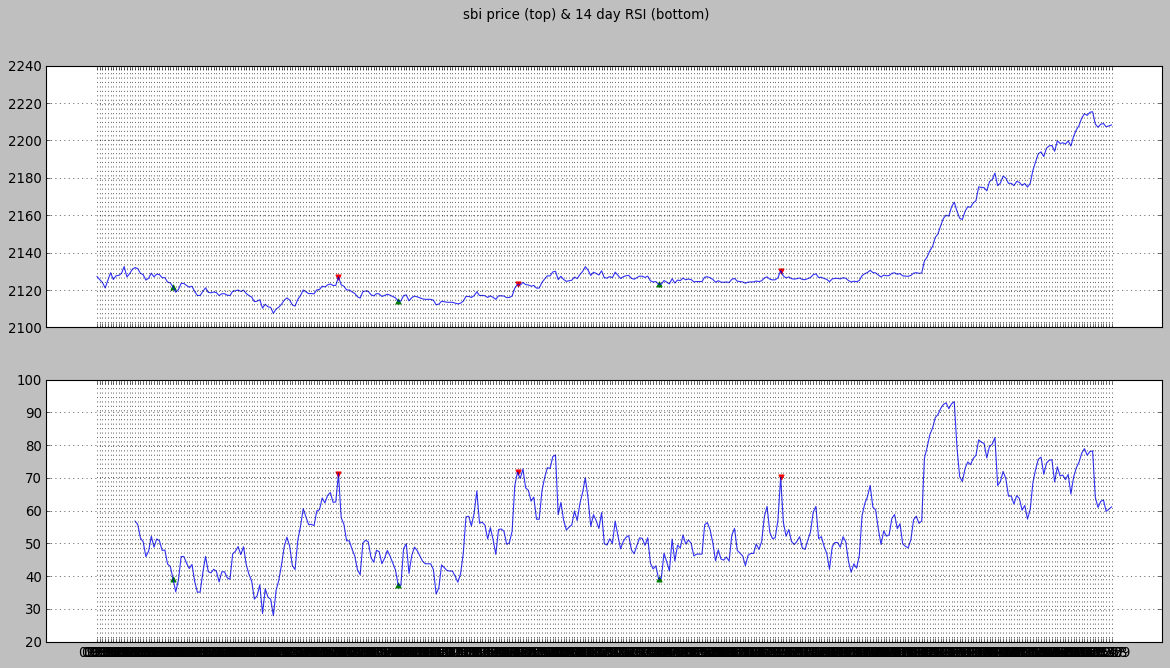

In [19]:
## chart the buy / sell signals:
plt.style.use('_classic_test')

fig, axs = plt.subplots(2, sharex=True, figsize=(18,9))
fig.suptitle('sbi price (top) & 14 day RSI (bottom)')

## chart the stock close price & buy/sell signals:
axs[0].scatter(df.index, df['buy signal'], color='green', marker='^', alpha=1)
axs[0].scatter(df.index, df['sell signal'], color='red', marker='v', alpha=1)
axs[0].plot(df['Close'],alpha=0.8)
axs[0].grid()

## chart RSI $ buy/sell signals:

axs[1].scatter(df.index, df['buy rsi'], color='green', marker='^', alpha=1)
axs[1].scatter(df.index, df['sell rsi'], color='red', marker='v', alpha=1)
axs[1].plot(df['rsi'],alpha=0.8)
axs[1].grid()